In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
d = 100 # dimensions of data
n = 1000 # number of data points

In [4]:
hf_train_sz = int(0.8 * n//2)

X_pos = np.random.normal(size=(n//2, d))
X_pos = X_pos + .12

X_neg = np.random.normal(size=(n//2, d))
X_neg = X_neg - .12

X_train = np.concatenate([X_pos[:hf_train_sz],
                          X_neg[:hf_train_sz]])

X_test = np.concatenate([X_pos[hf_train_sz:],
                         X_neg[hf_train_sz:]])

y_train = np.concatenate([np.ones(hf_train_sz),
                          -1 * np.ones(hf_train_sz)])

y_test = np.concatenate([np.ones(n//2 - hf_train_sz),
                         -1 * np.ones(n//2 - hf_train_sz)])

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape: (800, 100)
y_train.shape: (800,)
X_test.shape: (200, 100)
y_test.shape (200,)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
# Problem 4.1 and 4.2

def sgd(w, X, y, X_te, y_te, step_sz, steps):

    #fi(w) = log (1 + exp(−yi w^T xi)) 
    def logistic_loss(w, xi, yi):
      loss = np.log(1 + np.exp(-yi * (w.T @ xi))) 
      return loss

    def calculate_0_1_loss(w, x_i, y_i):
        y_prob = sigmoid(w.T @ x_i)
        y_pred = 1 if y_prob > 0.5 else -1  # Predict 1 if probability >= 0.5, otherwise predict 1
        loss = 0 if y_pred == y_i else 1
        
        return loss

    tr_obj_vals = np.empty(steps)
    obj_vals = np.empty(steps)
    
    loss01_vals = np.empty(steps)
    tr_loss01_vals = np.empty(steps)
    
    num_train, num_test = X.shape[0], X_te.shape[0]
    upper_bound_random_generator = X_te.shape[0]

    print("steps:", steps)
    print("X.shape:", X.shape)
    print("y.shape:", y_te.shape)
    print("X_te.shape:", X_te.shape)
    print("y_te.shape:", y_te.shape)

    print("num_train:", num_train)
    print("num_test:", num_test)
    print()
    
    for i in range(steps):

        #print("i:", i)

        # Calculates the average logistic loss for the training set
        train_logistic_loss = np.mean([logistic_loss(w, X[i], y[i]) for i in range(num_train)])
        #print("train_logistic_loss:", train_logistic_loss)
        tr_obj_vals[i] = train_logistic_loss
        
        # Calculates the average logistic loss for the testing set
        test_logistic_loss = np.mean([logistic_loss(w, X_te[i], y_te[i]) for i in range(num_test)])
        #print("test_logistic_loss:", test_logistic_loss)
        obj_vals[i] = test_logistic_loss
        
        # Calculates 0-1 loss for the training set
        train_loss01 = np.mean([calculate_0_1_loss(w, X[i], y[i]) for i in range(num_train)])
        #print("train_loss01:", train_loss01)
        tr_loss01_vals[i] = train_loss01
        
        # Calculates 0-1 loss for the testing set
        test_loss01 = np.mean([calculate_0_1_loss(w, X_te[i], y_te[i]) for i in range(num_test)])
        #print("test_loss01:", test_loss01)
        loss01_vals[i] = test_loss01
        

        #upgrade the w 
        random_index = np.random.randint(0, num_train)
        
        x_random = X[random_index]
        y_random = y[random_index]  

        #label value switch to match 0-1 loss 
        if y_random == -1:
            y_random = 0
        
        y_prob = sigmoid(w.T @ x_random)

        #print("y_random:", y_random)
        #print("y_prob:", y_prob)
        
        diff = y_prob - y_random
        gradient = diff * x_random
        w = w - step_sz * gradient

        #print("w.shape:", w.shape)
        #print()

    print("tr_obj_vals.shape:", tr_obj_vals.shape)
    print("obj_vals.shape:", obj_vals.shape)
    print("loss01_vals.shape:", loss01_vals.shape)
    print("tr_loss01_vals.shape:", tr_loss01_vals.shape)
    print("--------")
    
    return tr_obj_vals, obj_vals, loss01_vals, tr_loss01_vals 

In [7]:
tr_obj_vals1, obj_vals1, loss01_vals1, tr_loss01_vals1 = sgd(np.zeros(d), X_train, y_train, X_test, y_test, 
                                                             0.0005, 5000)
tr_obj_vals2, obj_vals2, loss01_vals2, tr_loss01_vals2 = sgd(np.zeros(d), X_train, y_train, X_test, y_test, 
                                                             0.005, 5000)
tr_obj_vals3, obj_vals3, loss01_vals3, tr_loss01_vals3 = sgd(np.zeros(d), X_train, y_train, X_test, y_test, 
                                                             0.05, 5000)

steps: 5000
X.shape: (800, 100)
y.shape: (200,)
X_te.shape: (200, 100)
y_te.shape: (200,)
num_train: 800
num_test: 200

tr_obj_vals.shape: (5000,)
obj_vals.shape: (5000,)
loss01_vals.shape: (5000,)
tr_loss01_vals.shape: (5000,)
--------
steps: 5000
X.shape: (800, 100)
y.shape: (200,)
X_te.shape: (200, 100)
y_te.shape: (200,)
num_train: 800
num_test: 200

tr_obj_vals.shape: (5000,)
obj_vals.shape: (5000,)
loss01_vals.shape: (5000,)
tr_loss01_vals.shape: (5000,)
--------
steps: 5000
X.shape: (800, 100)
y.shape: (200,)
X_te.shape: (200, 100)
y_te.shape: (200,)
num_train: 800
num_test: 200

tr_obj_vals.shape: (5000,)
obj_vals.shape: (5000,)
loss01_vals.shape: (5000,)
tr_loss01_vals.shape: (5000,)
--------


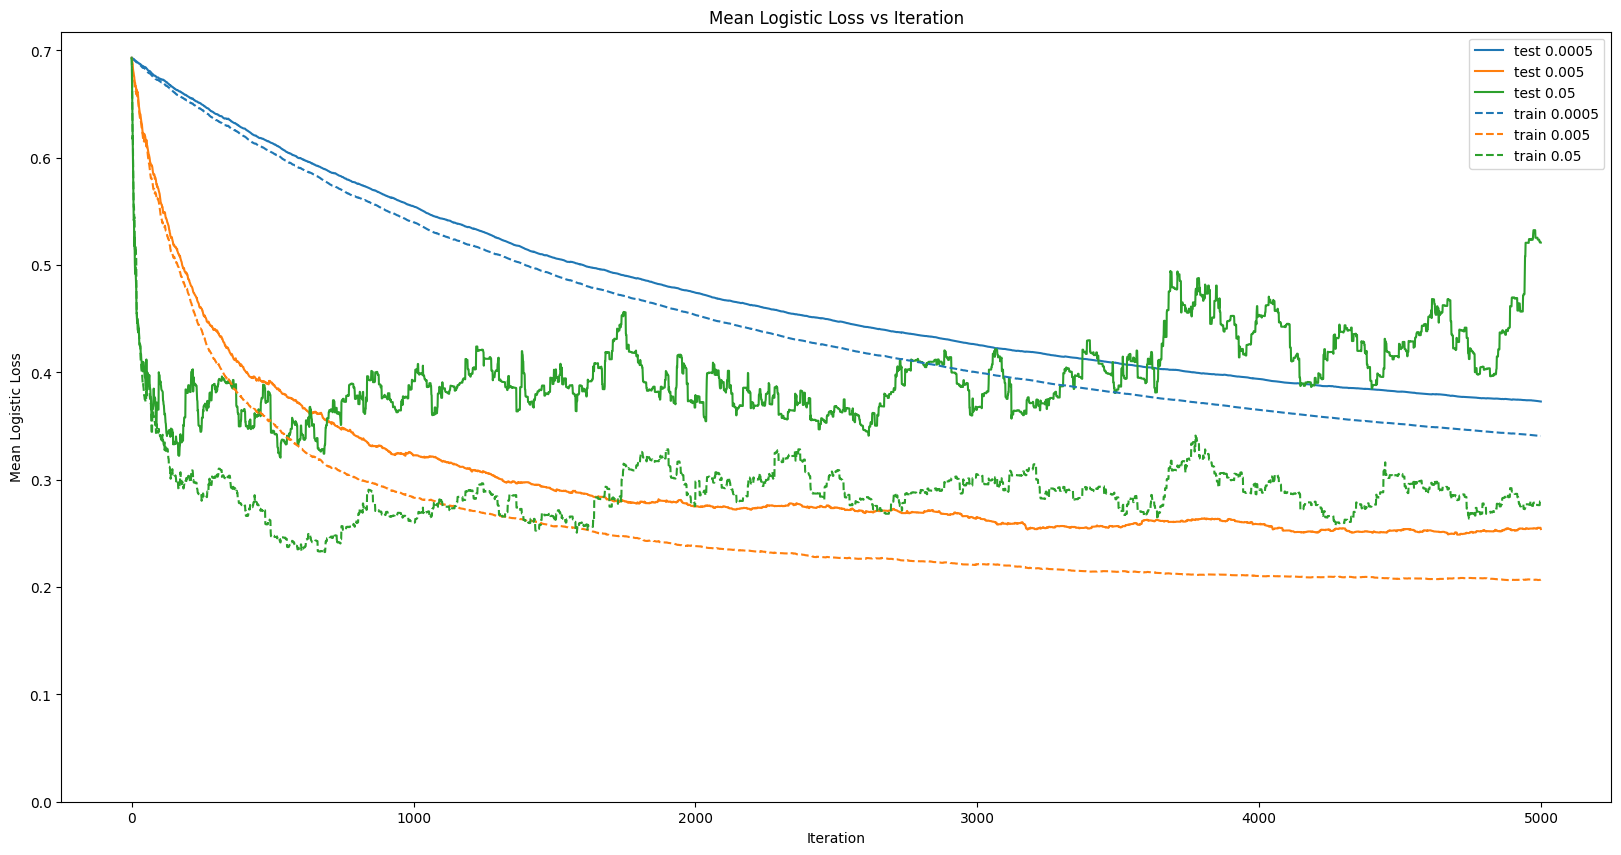

In [8]:
plt.plot(np.arange(5000), obj_vals1, label="test 0.0005")
plt.plot(np.arange(5000), obj_vals2, label="test 0.005")
plt.plot(np.arange(5000), obj_vals3, label="test 0.05")

plt.plot(np.arange(5000), tr_obj_vals1, '--', color='#1f77b4', label="train 0.0005")
plt.plot(np.arange(5000), tr_obj_vals2, '--', color='#ff7f0e', label="train 0.005")
plt.plot(np.arange(5000), tr_obj_vals3, '--', color='#2ca02c', label="train 0.05")

plt.title("Mean Logistic Loss vs Iteration")
plt.xlabel('Iteration')
plt.ylabel('Mean Logistic Loss')
plt.ylim(bottom=0)

fig = plt.gcf()
fig.set_size_inches((20, 10))
plt.legend()

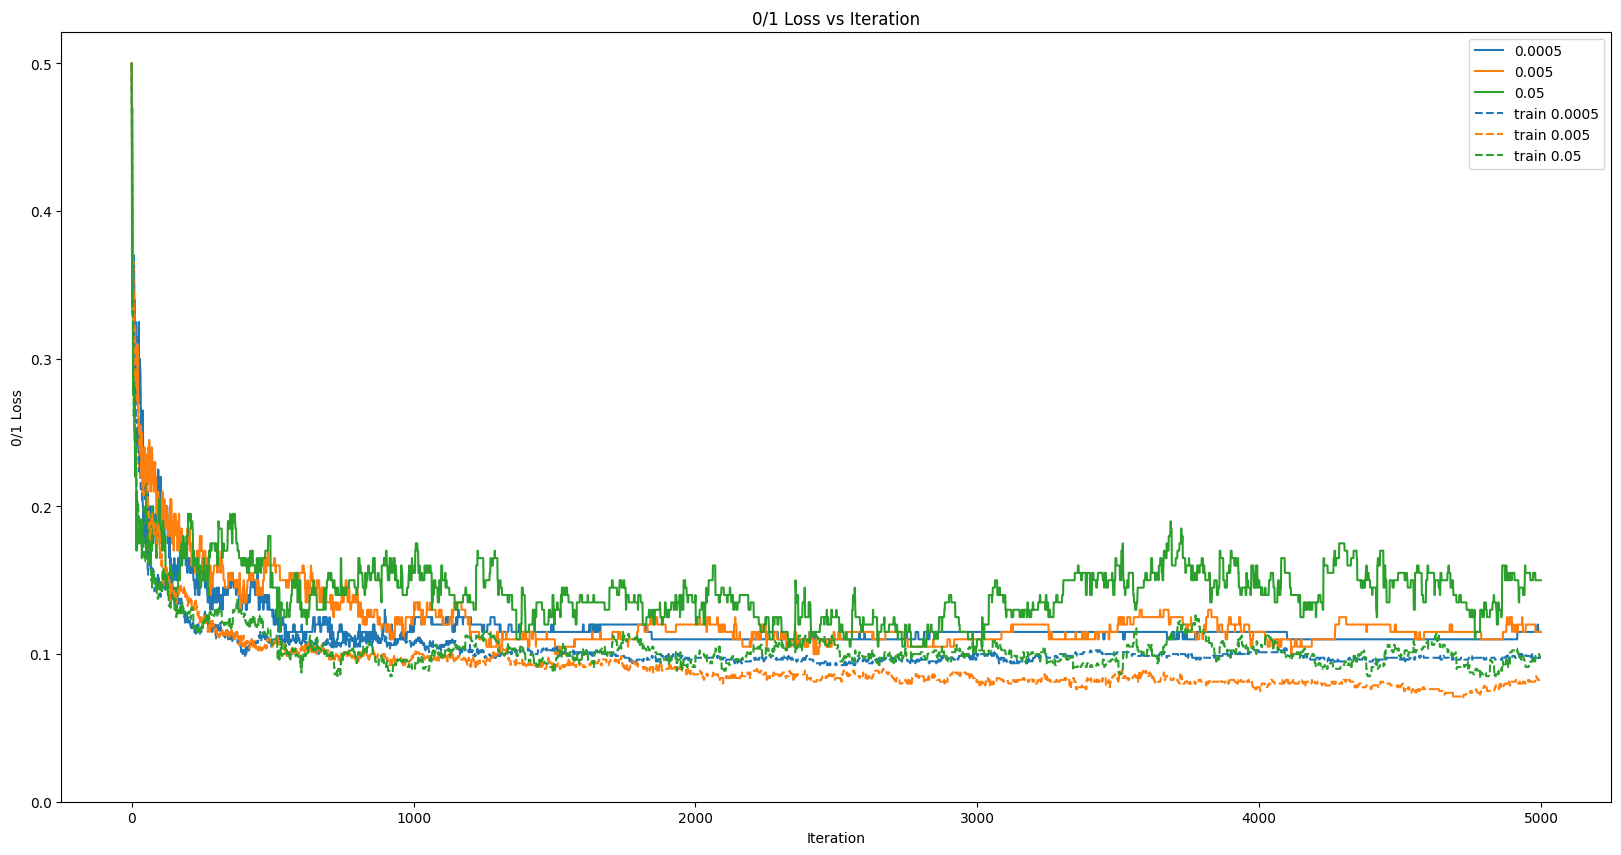

In [13]:
plt.plot(np.arange(5000), loss01_vals1, label="0.0005")
plt.plot(np.arange(5000), loss01_vals2, label="0.005")
plt.plot(np.arange(5000), loss01_vals3, label="0.05")

plt.plot(np.arange(5000), tr_loss01_vals1, '--', color='#1f77b4', label="train 0.0005")
plt.plot(np.arange(5000), tr_loss01_vals2, '--', color='#ff7f0e', label="train 0.005")
plt.plot(np.arange(5000), tr_loss01_vals3, '--', color='#2ca02c', label="train 0.05")

plt.title("0/1 Loss vs Iteration")
plt.xlabel('Iteration')
plt.ylabel('0/1 Loss')
plt.ylim(bottom=0)
#plt.ylim(bottom=0.5, top=1.0)

fig = plt.gcf()
fig.set_size_inches((20, 10))
plt.legend()

In [14]:
loss01_vals1[-1], loss01_vals2[-1], loss01_vals3[-1]

(0.115, 0.115, 0.15)